***
## **Introduction**
***

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/wtlow003/aiig-suss/blob/main/workshops/introduction-to-data-visualization/01-introduction-to-data-viz.ipynb)

In this notebook we will be using nba dataset from 
https://github.com/sivabalanb/Data-Analysis-with-Pandas-and-Python/blob/master/nba.csv. We will try to use visualization to answer  questions to see insights about the data.

Along the way, we will learn the process of `Exploratory Data Analysis`, or more commonly refered to as **EDA**. EDA can be defined as, 

> An approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

Hence, our focus today will be learning how to leverage on existing python packages such as `Matplotlib` and `Seaborn` to achieve this very objective. We will be using a dataset that contains information with regards to NBA players, such as their height, weight, age and pay scale. 

***
## **Getting started**
***

Before we get started with the actual code-along, we have to first install and subsequently load the relevant packages required to generate the relevant plots. 

To install the relevant packages, run the following the cell:

In [1]:
!pip install matplotlib
!pip install seaborn
!pip install missingno
# !pip install SciencePlots

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


Once we have installed the necessary packages, let's load the required packages. Generally, for an `EDA` process, we would require the following packages:

* `pandas`: To conduct manipulation and perform relevant transformation to the data
* `matplotlib`: To plot relevant data visualisations, considered to be a lower-level package
* `seaborn`: To plot relevant data visualisations, built on top of `matplotlib`. 
* `missingno`: Allows to visually observed missing data points with the dataset.

In [2]:
# import the necessary modules
# data manipulation package
import numpy as np
import pandas as pd

# visualisation packages
import matplotlib.pyplot as plt
import missingno as ms
import seaborn as sns

# plt.style.use(['science'])
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",   # specify font family here
    "font.serif": ["Palatino"],  # specify font here
    "font.size":12})

***
## **Loading dataset** and overview

Before we head on to answering the questions, I'd like to "`look`" at the dataset and have some knowledge about it. This will give me a clue if there will be a need to further explore and "`clean`" the data before visualization and analysis.
***

In [3]:
# using pandas to load dataset
df = pd.read_csv("https://raw.githubusercontent.com/sivabalanb/Data-Analysis-with-Pandas-and-Python/master/nba.csv")

# checking the first 5 rows of data


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Question: What are some of the features (*columns*) that you realised are present within the `dataframe`?:

> Ans: 

Just by looking at the first 5 rows of our dataset, we can immediately see the column names, namely:
    `Name`,`Team`,`Number`, `Position`, `Age`, `Height`, `Weight`, `College`, and `Salary`

Let's get the number of rows and columns present within the dataset so that we are clear with the size of the dataset we are dealing with!

In [5]:
# check basic dataset information, no of rows and cols
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

This dataset has 458 rows and 9 columns.


What about the type of data in columns? This information would be useful for us in the subsequent steps if we have to do some simple `data manipulation` to help us generate the `data visualisation` later! 

In [6]:
# checking column name and their dtypes (data types)


Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object


**Basic understanding of nba data and possible transformations:**

At this point, we can realise some 

- NBA dataset that we have has 458 entries and 9 features, consisting of float and object dtypes.
- the last entry is unnecessary as it does not add any data and can be deleted from the dataset.
- Number column which I assumed to be number of the player they put on their jerseys, are in float type. This number which I assumed as not a continuous number but rather a "trademark" of the players hence a discrete feature. This number can be converted to int type. We will see if this column is necessary on what we want to find out from the formulated questions.  
- Position features are categorical with fixed acronyms as values that indicate the player role in the team.
- Age is currently in float dtype.
- Height column is in object type, looking at the data using the head(), we can conclude that the height is in feet-inches measurement. We can convert this measurement into centimeters to aid our computation later on when we want see the height distributions of the players by visualizing or maybe we want to see the players BMIs.
- Weight is float dtype which makes sense if we would like to do computations on the weights of the players.
- College has quite less number of entries <code>373</code> out of 458 entries. This feature is categorical feature as it tells us the college states that players are from. We will check later on how this can affect the data.
- Salary has <code>446</code> over 458 entries and float types. We need to explore a bit more on this column to understand and think of how we can handle the missing data.


Hey! That's not enough. What about understanding some basic `descriptive statistics` about the dataset?

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,457,457,457.000000,457,457.000000,457,457.000000,373,4.460000e+02
unique,457,30,NaN,5,NaN,18,NaN,118,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,6-9,NaN,Kentucky,NaN
freq,1,19,NaN,102,NaN,59,NaN,22,NaN
mean,NaN,NaN,17.678337,NaN,26.938731,NaN,221.522976,NaN,4.842684e+06
std,NaN,NaN,15.966090,NaN,4.404016,NaN,26.368343,NaN,5.229238e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,NaN,200.000000,NaN,1.044792e+06
50%,NaN,NaN,13.000000,NaN,26.000000,NaN,220.000000,NaN,2.839073e+06
75%,NaN,NaN,25.000000,NaN,30.000000,NaN,240.000000,NaN,6.500000e+06


From the summary statistics above, we can observe that the Height did not have summary as with the other numerical features like Age. This confirms that we need to handle the height column.

Now, before we move on, aren't you interested in finding out how if we have any `missing` values in the dataframe? From a data analytics/science's perspective missing values indicates potential problems down the line that might either skewed your analysis or affect your model. Hence, let's find out *visually* if we have any missing values!

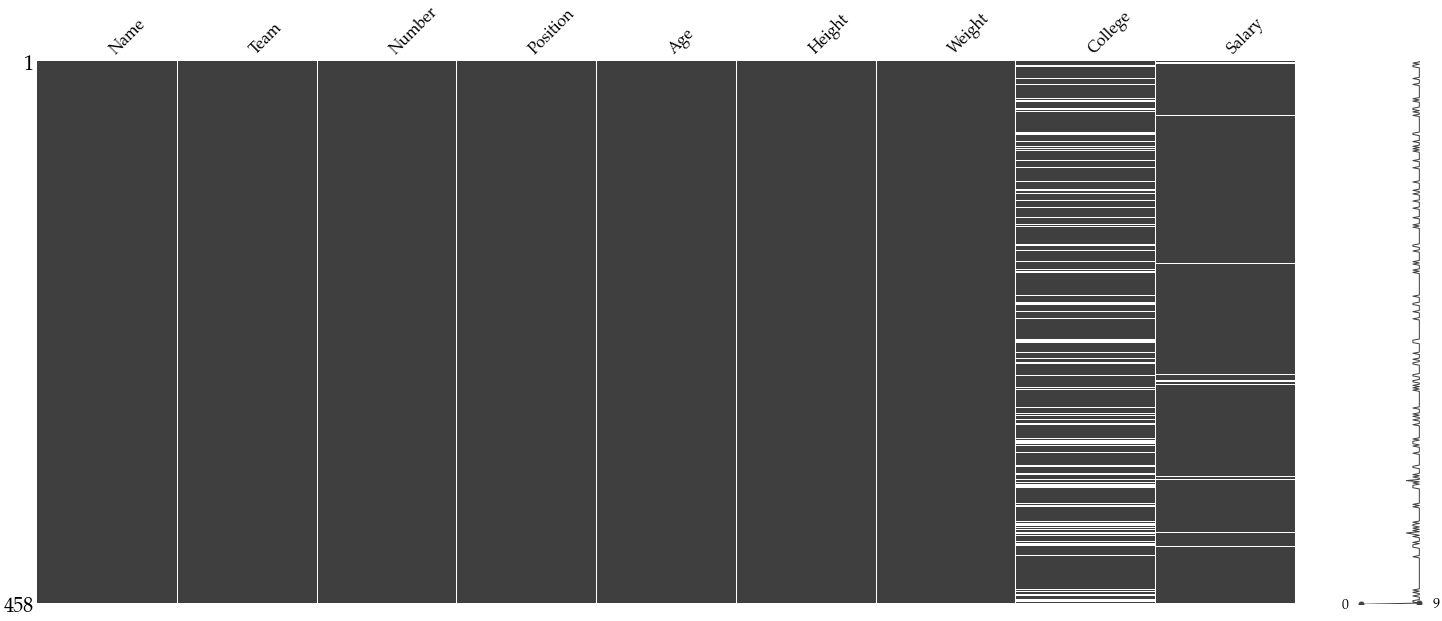

In [8]:
# plotting to see missing information
ms.matrix(df)
plt.show()    # to hide plot axes

In [9]:
# what about looking at missing values in numerical terms?
# checking % of missing records 


print(missing_pct.sort_values(ascending=False) * 100)

College     18.558952
Salary       2.620087
Name         0.218341
Team         0.218341
Number       0.218341
Position     0.218341
Age          0.218341
Height       0.218341
Weight       0.218341
dtype: float64


Now, we can see that <code>College</code> has the most missing values. <code>Salary</code> which can be important in our data has some missing values which we have to deal with. 

If you notice, the missing data percentage of the other columns are the same. 

GREAT! You have now completed the beginning steps to conduct an `EDA` process to help you better understand the dataset you have on hand. Let's move on to some basic `data manipulation` or `data transformation`. 

***
## **Data manipulation / transformation**
***

Before we begin, let me ask you a simple question! What do you observed about the `Height` column in the dataset? 

> Question: Do you think it is easy to understand, especially using considering `measurements` used in Singapore?

> Ans:  

From above we see that we can split the 'Height' by <code>-</code>, the number on the left being the measurement in foot and the number on the right of <code>-</code> being the measurement in inches. 
Then, we can compute the values into meters for our visualization later on.

In [11]:
# convert the height to cm so that we can easily understand it 
height_split = df["Height"].str.split("-", expand=True)
feet, inches = height_split[0].astype(float), height_split[1].astype(float)

# height conversation
# 1 ft = 12 inch, 1 inch = 2.54 cm
df["Height_Adjusted"] = (feet * 12 + inches) * 2.54

# removing old `Height` column
df = df.drop(["Height"], axis=1)

# checking first 5 rows to ensure transformation is conducted
df.head()

,Name,Team,Number,Position,Age,Weight,College,Salary,Height_Adjusted
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,180.0,Texas,7730337.0,187.96
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,235.0,Marquette,6796117.0,198.12
2,John Holland,Boston Celtics,30.0,SG,27.0,205.0,Boston University,NaN,195.58
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,185.0,Georgia State,1148640.0,195.58
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,231.0,NaN,5000000.0,208.28


From our quick "look" of data earlier we saw that the very last entry is empty and have no use for us so let's remove it from the dataset.

Whoo! we just did a basic cleaning. Let's move on to the next-'`Number`' column. This column is the number on the jersey of the player and currently having a type of float (decimal number). In our case, this number is a fixed number and just a number of the player which we do not need for computation unlike `Salary` or `Age`. Thus, we should convert its data type into `string` or text which is `object` data type in `pandas`.

In [12]:
# convert jersey no. to categorical (str) as it does not need to be in number 
df["Number"] = df["Number"].astype(str)

# checking the new dtype to ensure that changes was made
print(df.dtypes)

Name                object
Team                object
Number              object
Position            object
Age                float64
Weight             float64
College             object
Salary             float64
Height_Adjusted    float64
dtype: object


***
## **Preparing for data visualization**
***

In [13]:
# lets create a list for categorical and numerical features seperately 
cat_cols = list(df.columns[df.dtypes == 'object'])
num_cols = list(df.columns[df.dtypes != 'object'])

# print some statement to verify the result
print(f"There are categorical cols: {len(cat_cols)} and numerical cols: {len(num_cols)}.")

print(f"\nIndex of categorical columns:")
for i, col in enumerate(cat_cols):   
    print(f"{i}: {col}")

print(f"\nIndex of numerical columns:")
for i, col in enumerate(num_cols):   
    print(f"{i}: {col}")

There are categorical cols: 5 and numerical cols: 4.

Index of categorical columns:
0: Name
1: Team
2: Number
3: Position
4: College

Index of numerical columns:
0: Age
1: Weight
2: Salary
3: Height_Adjusted


***
## **Data visualization**
***

After we had spent some time digging through the dataset and answered a few of the questions on hand, we have now reached the `Exploratory Data Analysis (EDA)` stage, where we are going to utilise various visualisation methods such as `Bar Chart`, `Pie Chart`, `Histograms`, `Scatter Plot` and `Line Plot` to help visualise the data. After all, human are trained to retain [visual information](https://www.shiftelearning.com/blog/bid/350326/studies-confirm-the-power-of-visuals-in-elearning) longer than written (textual) information.


The following serves as a valuable cheatsheet if you are just starting out in Data Science. It provides you with a high level overview in what each visualisation attempts to communicate and the different types available.

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1688884%2Fb4372f0e806b6f75c7b56904b1159a68%2FData%20Visualization%20Cheatsheet.jpg?generation=1592767560257939&alt=media" width="600" height="600" align="center"/>

In [14]:
# let set some pre-plotting configurations

FIGSIZE = (12, 8)

In [15]:
# define some useful functions to reduce the line of code written
def plot_hist(x, xlabel, ylabel, title, figsize, package='seaborn'):
    """Generic function to plot histogram. 
    
    Args:
        x ([pd.Series]):
        xlabel ([str]):
        ylabel ([str]):
        title ([str]):
        figsize ([tuple]):
        package ([str]): Between `matplotlib` and `seaborn`. Default to ['seaborn']
    """
    plt.figure(figsize=figsize)
    
    if package == 'seaborn':
        sns.histplot(x)
    else:
        plt.hist(x)
    # defining x-axis
    plt.xlabel(xlabel)
    # defining y-axis
    plt.ylabel(ylabel)
    # defining title
    plt.title(title)
    plt.show()

***
### **`Univariate` EDA**
***

To start off with `data visualization`, let's conduct `univariate EDA`. What exactly is *univariate*? We defined `univariate` as:

> Looking at one variable (data column) at a time. 

This is akin to looking at `Height_Adjusted`, `Weight` independently. We are not interested in understanding the relationship at this stage. 


### **Understanding player's information**

> Question: What is the distribution of the player's height and weight?

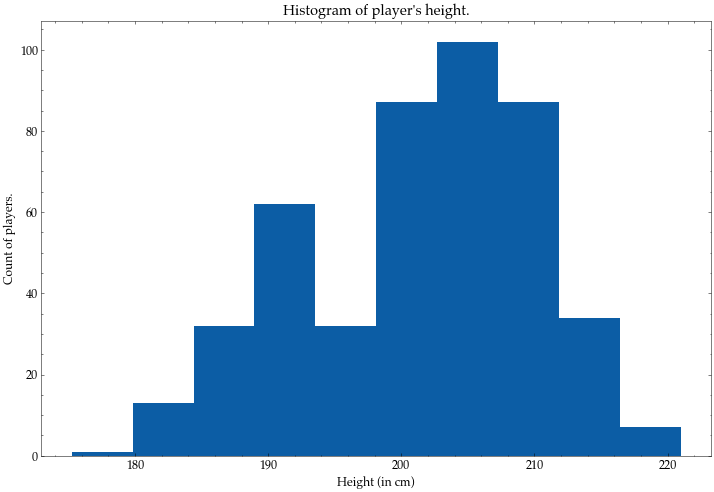

In [16]:
# let look at height first
# let's try plotting via `matplotlib`'s way

# defining 'x-axis'
height = df["Height_Adjusted"]

# defining plot size

# plotting the viz

# defining x-axis

# defining y-axis

# defining title


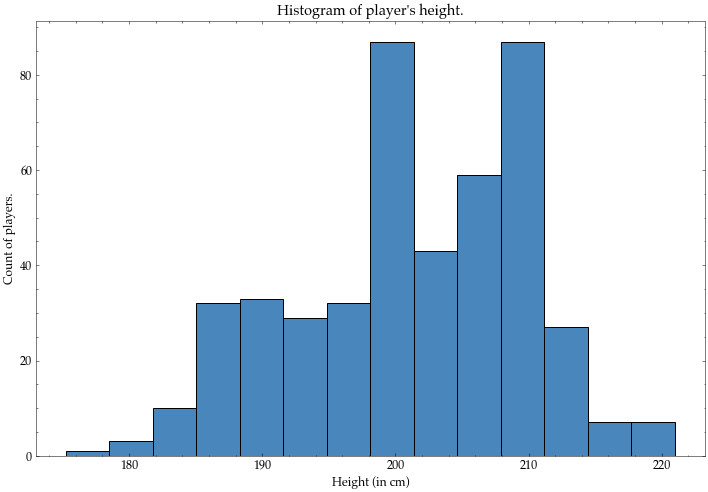

In [17]:
# let's plot via `seaborn`

# defining plot size

# plotting the viz

# defining x-axis

# defining y-axis

# defining title


> Since now you have experience how to plot for `Height_Adjusted`, what about `Weight`?

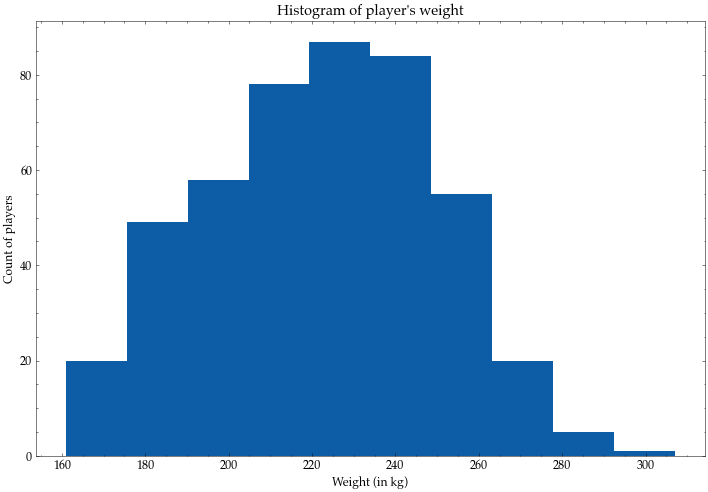

In [18]:
# plot matplotlib for `Weight`

# defining `weight`
weight = df["Weight"]

plot_hist(x=weight,
          xlabel="Weight (in kg)",
          ylabel="Count of players", 
          title="Histogram of player's weight", 
          figsize=FIGSIZE, 
          package='matplotlib')

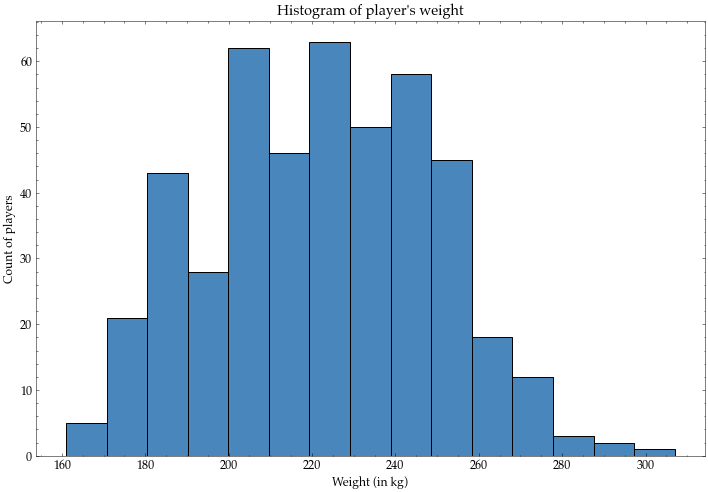

In [19]:
# plot seaborn for `Weight`
plot_hist(x=weight,
          xlabel="Weight (in kg)",
          ylabel="Count of players", 
          title="Histogram of player's weight",
          figsize=FIGSIZE,
          package='seaborn')

***
### **`Bivariate` EDA**
***

So what is `bivariate`?

> Looking at exactly **TWO** variables (data columns) at a time.

We can now start to explore the relationship among the various attributes in the dataset, such as:

* "Are taller players heavier in weight?", 
* "Do players in a particular position get paid more?" or 
* "Which team has the average tallest height?".

### **Understanding relationships between two features**

> Are tall players really heavier? 

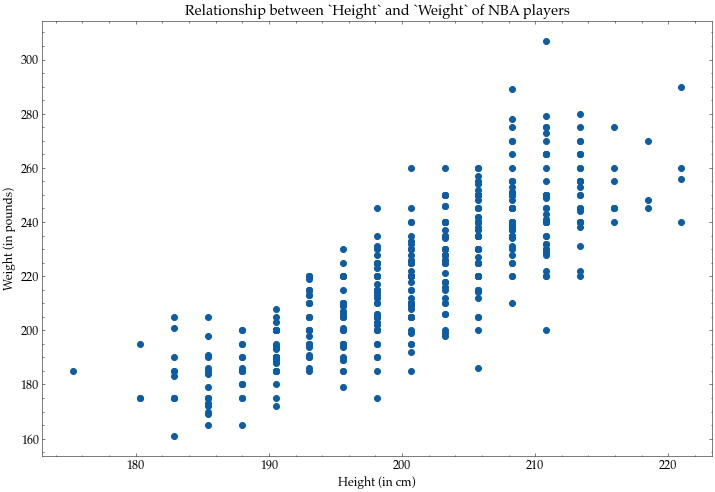

In [20]:
# creating a scatter plot to see the relationship

# height
height = df["Height_Adjusted"]
# weight
weight = df["Weight"]

# defining plot size


# plotting a scatter plot using matplotlib

# defining x-axis

# defining y-axis

# defining title


/Users/jensen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


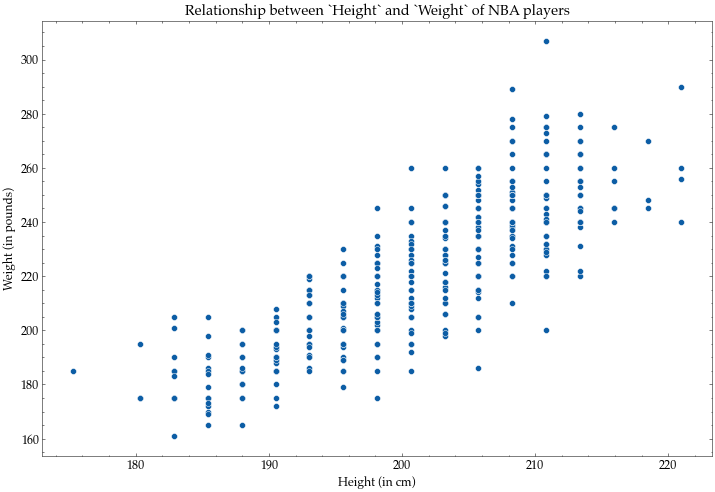

In [21]:
# defining plot size
plt.figure(figsize=FIGSIZE)

# plotting a scatter plot using seaborn

# defining x-axis

# defining y-axis

# defining title


> Do you find it hard to see with just data points? Let's add a `line of best fit`!

/Users/jensen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


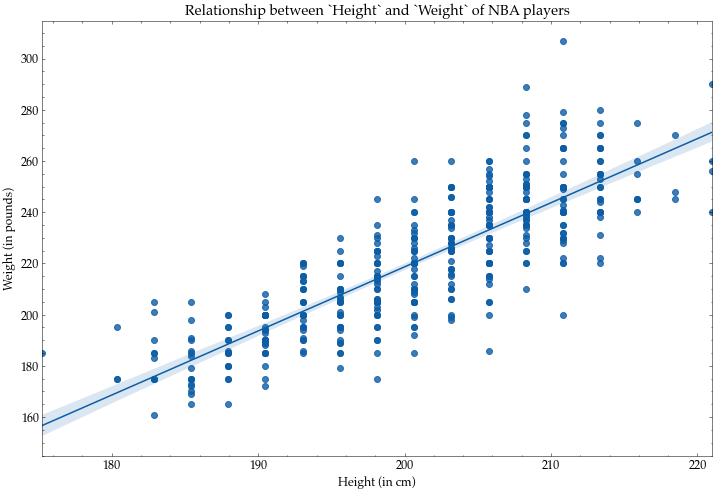

In [22]:
# defining plot size

# plotting a scatter plot using seaborn

# defining x-axis

# defining y-axis

# defining title


If you have taken introductory `statistics` courses, you will realise that `regplot()` is actually plotting the result of `regression`. In this case, we **DO** observe that players who are taller (in cm) is instead *heavier* on average.

### **Understanding salary by playing position**

> Stars like `Lebron James` and `Kevin Durant` seems to get paid alot and they play the `forward` position. Do these position pay more?

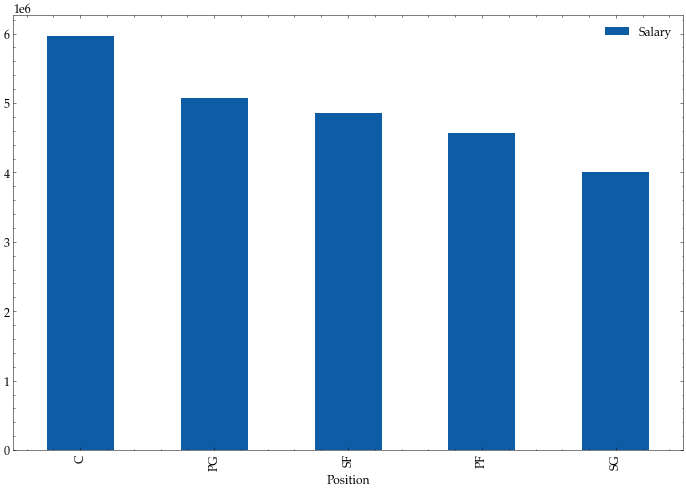

In [23]:
# looking at which position get paid most


# plot team by their aggregated height
# using pandas's plot method to plot bar plots


plt.show()

<Figure size 864x576 with 0 Axes>

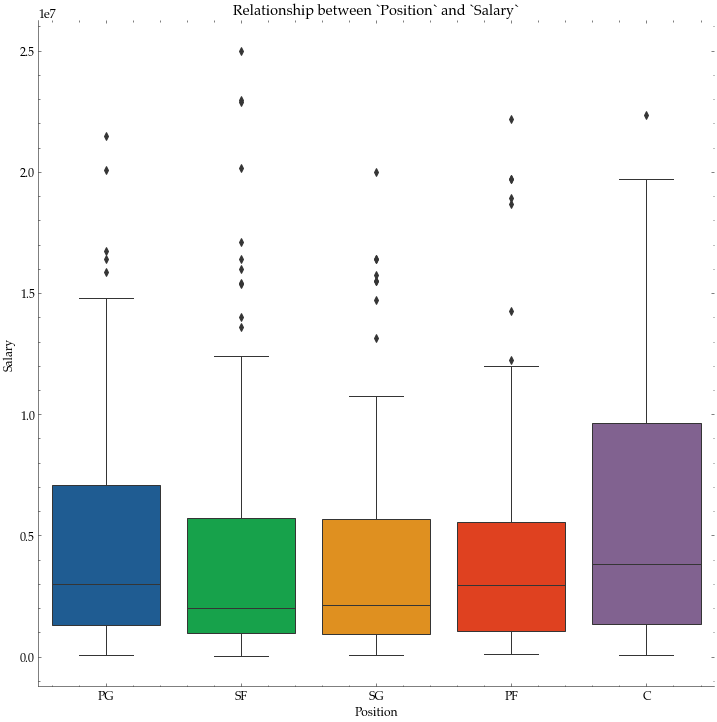

In [24]:
# looking at a range of salary by position

# defining plot size

# plotting a boxplot using seaborn

# defining x-axis

# defining y-axis

# defining title


### **Understanding player's information on team-level**

We have previously plotted information on `Height_Adjusted` and `Weight` based on a player-level. That means we are looking at the data row by row, record by record. There will be time we might need to `aggregate` the dataset in a certain level before we visualize it.

                        Height_Adjusted
Team                                   
Atlanta Hawks                201.337333
Boston Celtics               198.797333
Brooklyn Nets                199.644000
Charlotte Hornets            200.998667
Chicago Bulls                202.522667
Cleveland Cavaliers          200.998667
Dallas Mavericks             202.692000
Denver Nuggets               200.998667
Detroit Pistons              200.152000
Golden State Warriors        201.845333
Houston Rockets              201.845333
Indiana Pacers               200.152000
Los Angeles Clippers         199.644000
Los Angeles Lakers           202.014667
Memphis Grizzlies            198.966667
Miami Heat                   201.337333
Milwaukee Bucks              201.930000
Minnesota Timberwolves       204.288571
New Orleans Pelicans         200.258947
New York Knicks              202.247500
Oklahoma City Thunder        202.014667
Orlando Magic                200.478571
Philadelphia 76ers           201.506667


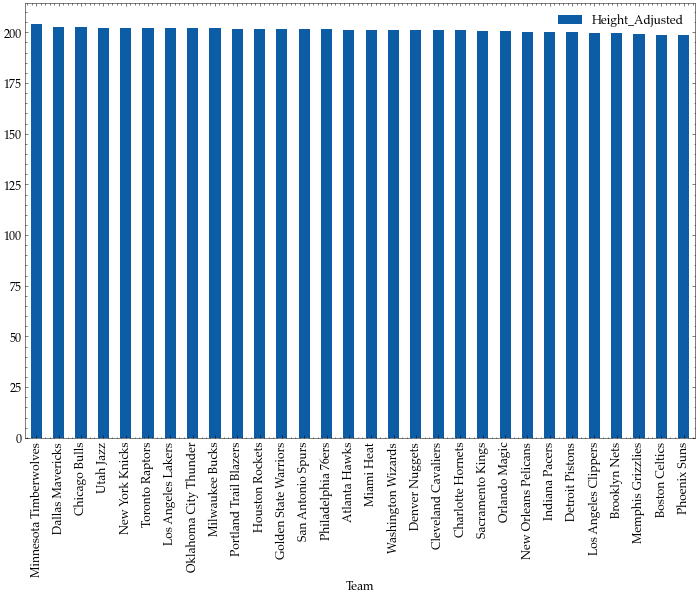

In [25]:
# let's aggregate the height by the team level, we will do mean aggregation


# let's see the result


# plot team by their aggregated height
# using pandas's plot method



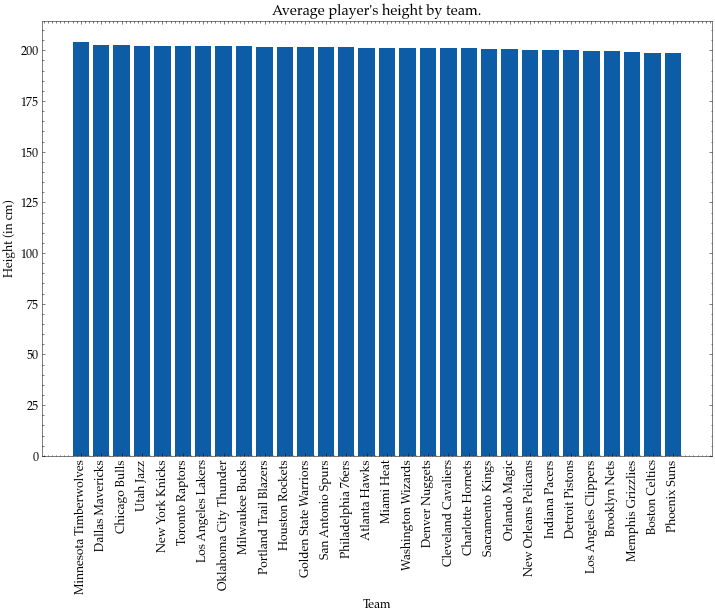

In [26]:
# plotting in matplotlib 


# defining plot size

# plotting the viz

# defining x-axis

# defining y-axis

# rotating x-axis 90 degree

# defining title


/Users/jensen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


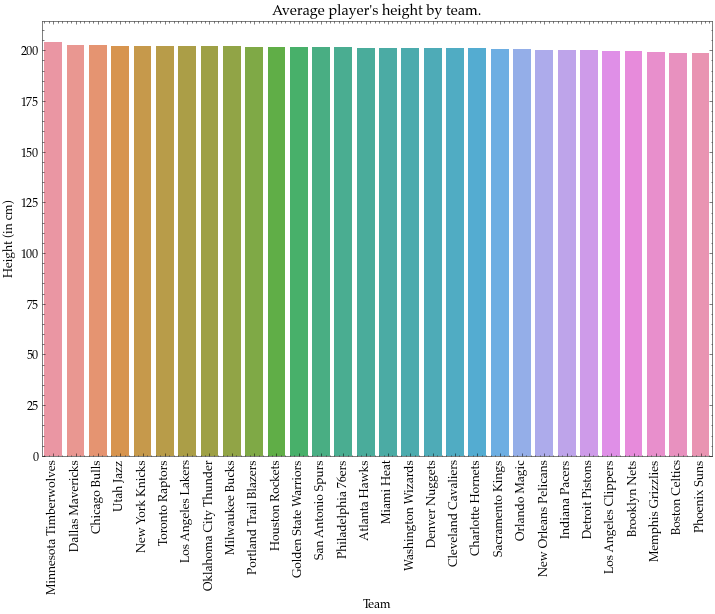

In [27]:
# plotting in seaborn

# defining plot size

# plotting the viz

# defining x-axis

# defining y-axis

# rotating x-axis 90 degree

# defining title


> Can you plot the maximum `Height_Adjusted` for each team? 

In [28]:
# let's aggregate the height by the team level, we will do the max limit 


# create the label and values
labels = max_height_team.index.tolist()
heights = max_height_team["Height_Adjusted"].values.tolist()

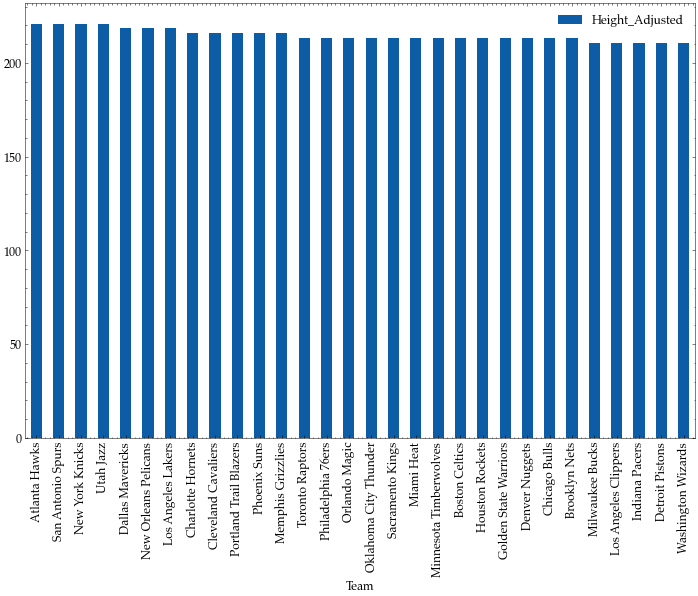

In [29]:
# pandas's plot

# plot team by their max height
# using pandas's plot method


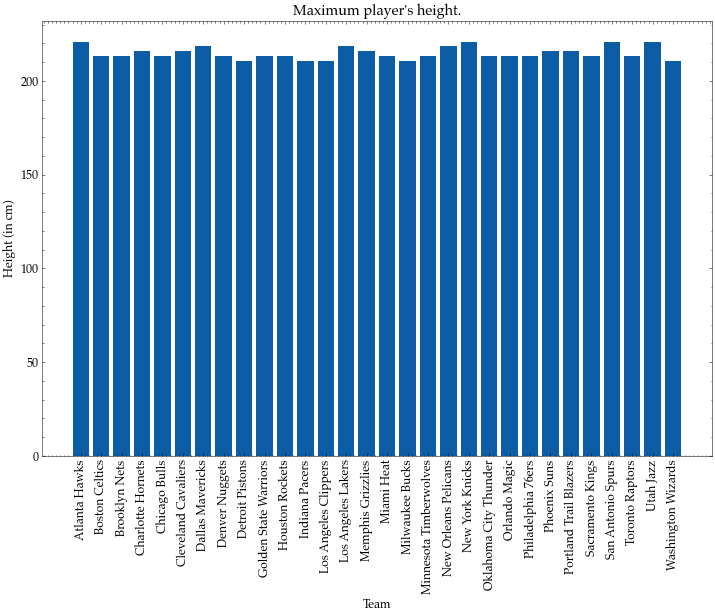

In [30]:
# matplotlib

# defining plot size

# plotting the viz

# defining x-axis

# defining y-axis

# rotating x-axis 90 degree

# defining title


/Users/jensen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


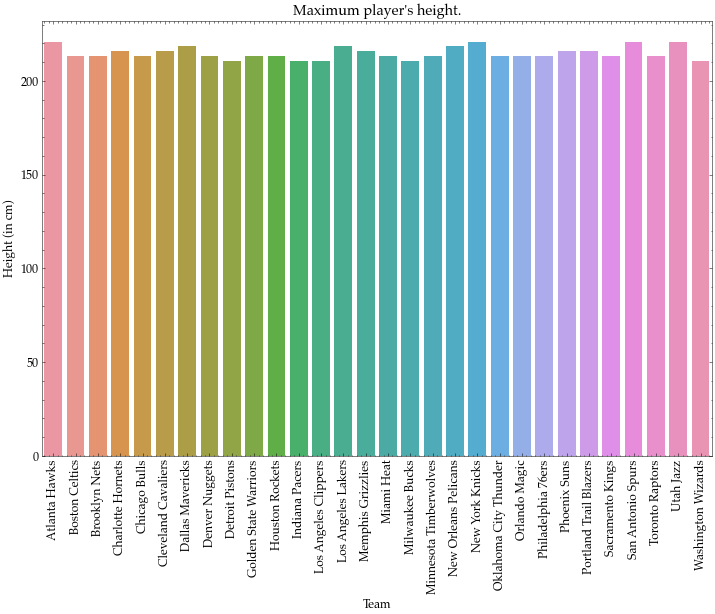

In [31]:
# seaborn

# defining plot size

# plotting the viz

# defining x-axis

# defining y-axis

# rotating x-axis 90 degree

# defining title


***
### **`Multivariate` EDA**
***

Earlier on we have defined the list of `numerical` columns present within the dataset. Now, previously you have also seen how we plotted `scatter plot` and `regression plot`, which allows us to visualize the relationship between features. 

> Now, instead of focusing on just `two` variables, we will be looking at **ALL** the numerical features's relationship at once.

<Figure size 864x576 with 0 Axes>

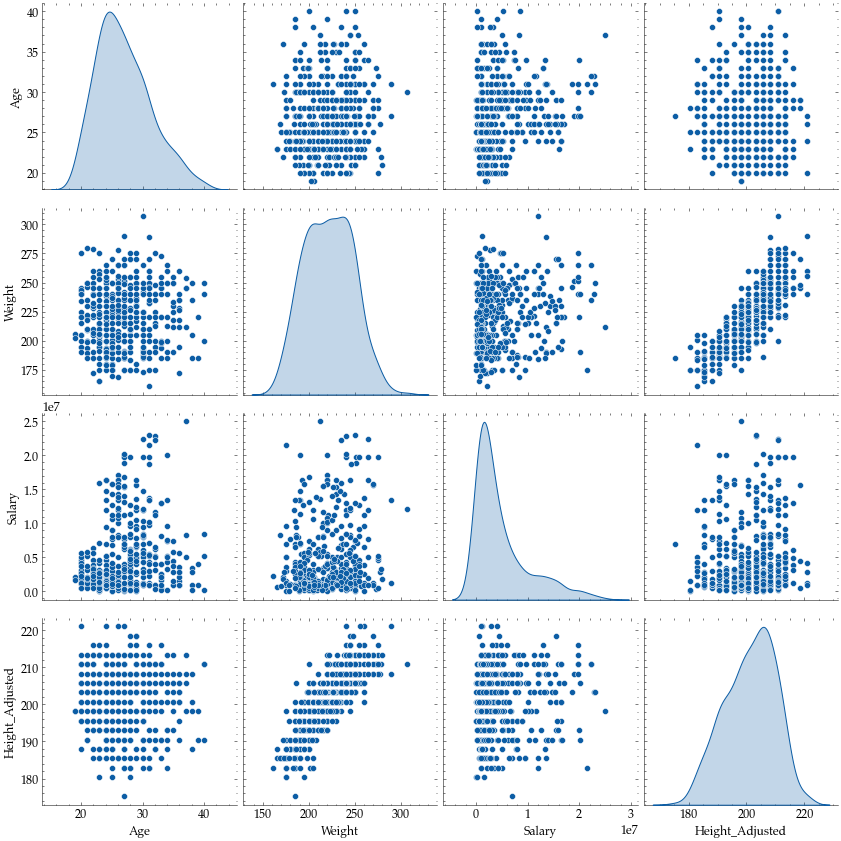

In [32]:
# let plot a combination of univariate EDA and bivariate EDA -> resulting in a multivariate EDA

# subset numerical columns only 
num_data = df.loc[:, num_cols]

# defining plot size
plt.figure(figsize=FIGSIZE)
# plot `pairplot` which allows us to visualize all numerical variables at once


### **Visualizing correlations**

> Let's visualize the relationship (correlations) between all numerical columns all at once

In [33]:
def plot_correlation_map(cont_cols, figsize=(25,20)):
    # references: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

    # dataframe subset
    cont_data = df.loc[:, num_cols]

    # define mask to isolate upper right triangle
    mask = np.triu(np.ones_like(cont_data.corr(), dtype=np.bool))

    # setting plot size
    plt.figure(figsize=figsize)
    heatmap = sns.heatmap(cont_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [34]:
def plot_correlation_bar(cont_cols, figsize=(10, 15)):
    
    # subset data
    corr_sales = df.loc[:, num_cols].corr()[['Salary']]

    # setting plotting figure
    plt.figure(figsize=figsize)
    heatmap = sns.heatmap(corr_sales.sort_values(by='Salary', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    plt.show()

<ipython-input-33-20e40197c7f0>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cont_data.corr(), dtype=np.bool))


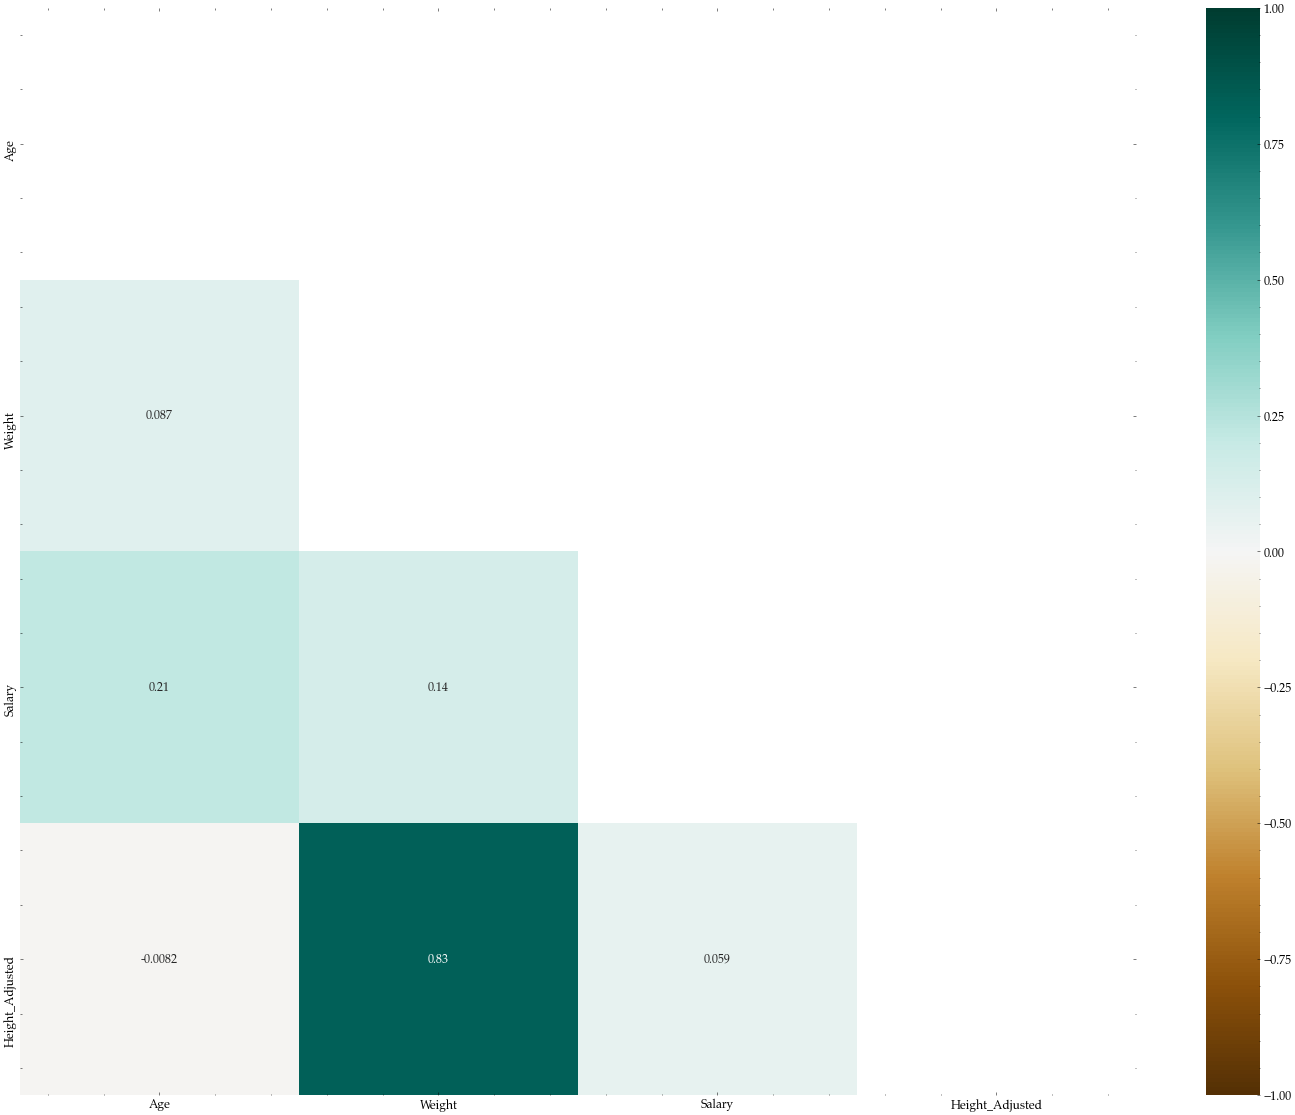

In [35]:
plot_correlation_map(num_cols)

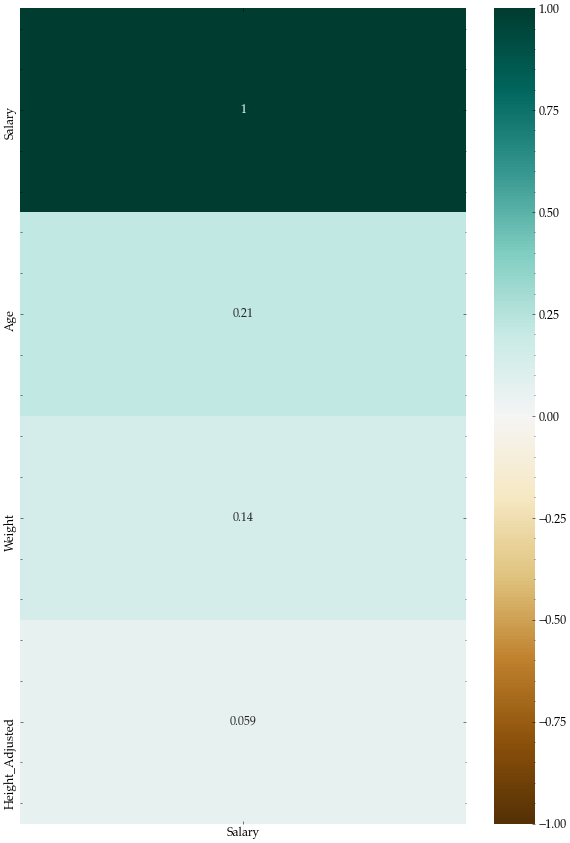

In [36]:
plot_correlation_bar(num_cols)